In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create a list of all the letters in the alphabet, then create a list, appending each letter to the given url

In [2]:
a=ord('a')
alph=[chr(i) for i in range(a,a+26)]
allurls = []
for i in range(0, len(alph)):
    allurls.append("https://www.basketball-reference.com/players/" + alph[i])

### Perform a read_html on each url, excluding for 'X' since there is no data for players with a last name that starts with an 'X' (this takes a while to load)

In [3]:
tabs = []
for i in [x for x in range(0, len(allurls)) if x != 23]: 
    tabs.append(pd.read_html(allurls[i]))

### Merge all of the dataframes together from each table

In [4]:
my_df = pd.DataFrame()

for i in range(0, len(tabs)):
    my_df = my_df.append(tabs[i][0])  

In [21]:
my_df.head()
len(my_df)

4684

### Subtract 'From' from 'To' to calculate how many years the player played for

In [6]:
pd.to_numeric(my_df['From'])
pd.to_numeric(my_df['To'])
pd.to_numeric(my_df['Wt'])

my_df['years_played'] = my_df['To'] - my_df['From']

In [7]:
my_df.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,years_played
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State,9
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",LSU,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","Michigan, San Jose State",5


### Create a column that calculates the players height in inches

In [8]:
#my_df['feet'] = pd.to_numeric(my_df['Ht'].str[0])
#my_df['inches'] = pd.to_numeric(my_df['Ht'].str[2:])
my_df['Ht_in'] = pd.to_numeric((pd.to_numeric(my_df['Ht'].str[0]) * 12) + pd.to_numeric(my_df['Ht'].str[2:]))

In [9]:
my_df.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,years_played,Ht_in
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke,4,82
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State,9,81
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,19,86
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",LSU,10,73
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","Michigan, San Jose State",5,78


### Check the last element of each row in the 'Player' column. If there is an asterisk, this means that they are a Hall of Famer and the their value in the 'HoF' column will be 'True'

In [10]:
my_df['HoF'] = np.where(my_df['Player'].str[-1:] == '*', 'True', 'False')

In [11]:
my_df.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,years_played,Ht_in,HoF
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke,4,82,False
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State,9,81,False
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,19,86,True
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",LSU,10,73,False
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","Michigan, San Jose State",5,78,False


In [12]:
hofs = my_df[my_df['HoF'] == 'True']

In [13]:
hofs.head(3)

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,years_played,Ht_in,HoF
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,19,86,True
63,Ray Allen*,1997,2014,G,6-5,205.0,"July 20, 1975",UConn,17,77,True
122,Tiny Archibald*,1971,1984,G,6-1,150.0,"September 2, 1948",Texas-El Paso,13,73,True


Text(0.5, 1.0, 'Height and Hall of Famers')

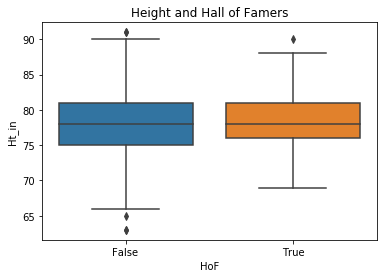

In [14]:
sns.boxplot(data=my_df, x = 'HoF', y = 'Ht_in').set_title('Height and Hall of Famers')


Text(0.5, 1.0, 'Weight and Hall of Famers')

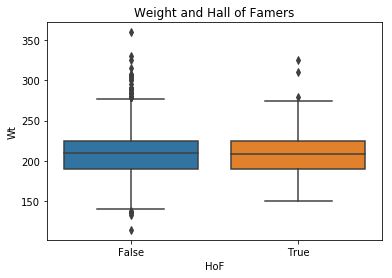

In [15]:
sns.boxplot(data=my_df, x = 'HoF', y = 'Wt').set_title('Weight and Hall of Famers')

Text(0.5, 1.0, 'Years Played and Hall of Famers')

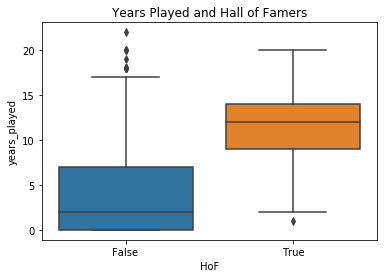

In [16]:
sns.boxplot(data=my_df, x = 'HoF', y = 'years_played').set_title('Years Played and Hall of Famers')

In [17]:
#my_df[my_df['Wt'] > 300]
#my_df[my_df['Ht_in'] > 90]
#my_df[my_df['years_played'] > 18]

Text(0.5, 1.0, 'Height and Hall of Famers')

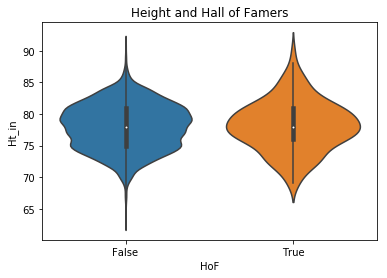

In [18]:
sns.violinplot(data=my_df, x = 'HoF', y = 'Ht_in').set_title('Height and Hall of Famers')

Text(0.5, 1.0, 'Weight and Hall of Famers')

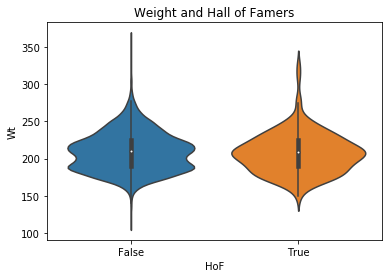

In [19]:
sns.violinplot(data=my_df, x = 'HoF', y = 'Wt').set_title('Weight and Hall of Famers')

Text(0.5, 1.0, 'Years Played and Hall of Famers')

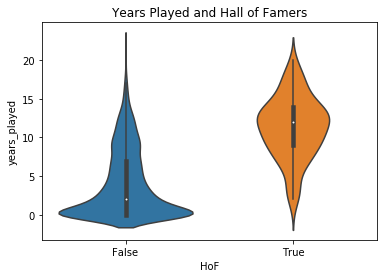

In [20]:
sns.violinplot(data=my_df, x = 'HoF', y = 'years_played', split=True).set_title('Years Played and Hall of Famers')

### Comment on anything interesting that you learned.

Something I found very interesting was looking at the plots of the height and weight and how they are distributed. They are normally distributed, whereas the distribution for years played for non Hall of Famers does not appear to be. I also liked looking at the means, max, and mins of the heights and weights of all of the players.